# 0. 起始準備，連接雲端硬碟 (Google Drive + Colab)

In [ ]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/class_AI/ex_cifar10/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/ex_cifar10
/content/drive/MyDrive/class_AI/ex_cifar10
1_MLP_model.ipynb  3_CNN_evaluation.ipynb  output2.html
2_CNN_model.ipynb  cifar10.h5


In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)

In [17]:
# 載入資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
x_test_normalize = x_test.astype('float32') / 255

# One-hot編碼
y_test_bk = y_test.copy()   # 備份 Y_test 資料集
y_test_onehot = to_categorical(y_test)

# 建立Keras的Sequential模型
model = Sequential()
model = load_model('cifar10.h5')

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 2. 預測與結果分析

In [21]:
# 評估模型
print('Testing ...')
loss, accuracy = model.evaluate(x_test_normalize, y_test_onehot, verbose=0)
print('測試資料集的準確度 = {:.2f}'.format(accuracy))

# 計算分類的預測值
print('\nPredicting ...')
prediction_prob = model.predict(x_test_normalize)
prediction = prediction_prob.argmax(axis = -1)
print(prediction)


Testing ...
測試資料集的準確度 = 0.72

Predicting ...
[3 8 8 ... 5 1 7]


## 使用混淆矩陣分析析預測結果

In [22]:
# 顯示混淆矩陣
tb = pd.crosstab(y_test.astype(int).flatten(), prediction.astype(int), rownames=['label'], colnames=['predict'])
print(tb)
# tb.to_html('output.html')

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        743   19   41   15   26    4   12   17   76   47
1         12  850    8    4    1    5    8    3   20   89
2         63    5  525   49  150   68   67   39   16   18
3         20   11   61  490   99  179   61   38   14   27
4         23    3   47   54  740   28   34   61    7    3
5         12    1   33  163   71  622   23   49   15   11
6          2    8   36   57   55   24  808    2    4    4
7         13    2   27   31   63   65    6  771    2   20
8         56   39    8   13   11    5    6    6  826   30
9         23   77    7   13    9    4    6   11   29  821


## 繪出分類的預測機率

    label  predict
3       0        8
15      8        6
21      0        2
24      5        4
25      2        4
Index:  7040
Index:  9363


(-0.5, 31.5, 31.5, -0.5)

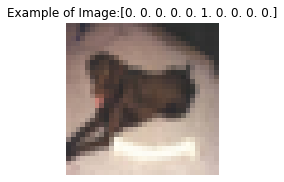

In [26]:

import matplotlib.pyplot as plt

# 建立分類錯誤的 DataFrame 物件
y_test_flattern = y_test.flatten()
df = pd.DataFrame({'label': y_test_flattern, 'predict': prediction})
df = df[y_test_flattern!=prediction]  # 篩選出分類錯誤的資料
print(df.head())
df.head().to_html('output2.html')

# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print('Index: ', i)
img = x_test_normalize[i] 

# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print('Index: ', i)
img = x_test[i] 

# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title('Example of Image:' + str(y_test_onehot[i]))
plt.imshow(img, cmap='binary')
plt.axis('off')


Predicting ...


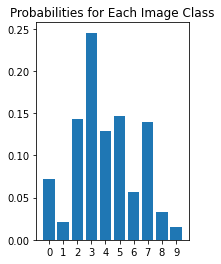

In [ ]:
# 預測結果的機率

plt.subplot(1,2,2)
plt.title('Probabilities for Each Image Class')
plt.bar(np.arange(10), predition_prob[i].reshape(10), align='center')
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()